In [1]:
import pandas as pd
from arch.unitroot import ADF, KPSS
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Extrayendo variable a analizar desde base de datos de Yunque Capital
imae = "'MRD-SR-05-01'" #indice en base de datos de Yunque Capital
conn = pyodbc.connect(driver='{ODBC Driver 17 for SQL Server}', 
                    server='<servername>', 
                    database='<databasename>', 
                    uid='<user>', 
                    pwd='<password>')
c= conn.cursor()
query = "EXEC selectVariable @INDICE =" + str(imae) #Query a la base de datos
df = pd.read_sql(query,conn) #Enviando query a base de datos
df["Fecha"]=pd.to_datetime(df['Fecha'], utc=True) #Cambiando formato de columna de fechas
df = df.set_index('Fecha') #Estableciendo indice de fechas
df

,Valor
Fecha,
2007-01-01 00:00:00+00:00,93.962898
2007-02-01 00:00:00+00:00,96.945709
2007-03-01 00:00:00+00:00,101.344367
2007-04-01 00:00:00+00:00,95.749101
2007-05-01 00:00:00+00:00,103.456807
...,...
2022-10-01 00:00:00+00:00,199.389531
2022-11-01 00:00:00+00:00,210.877491
2022-12-01 00:00:00+00:00,219.291437


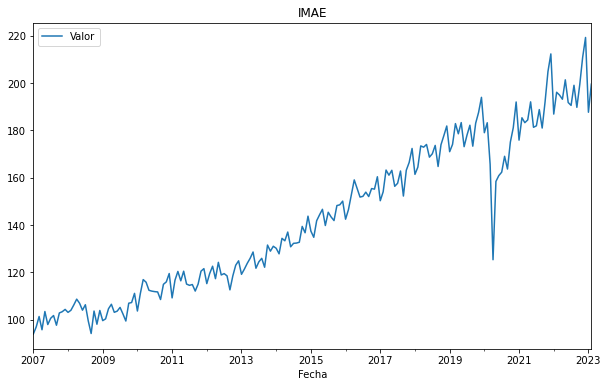

In [2]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(title="IMAE", ax=ax)

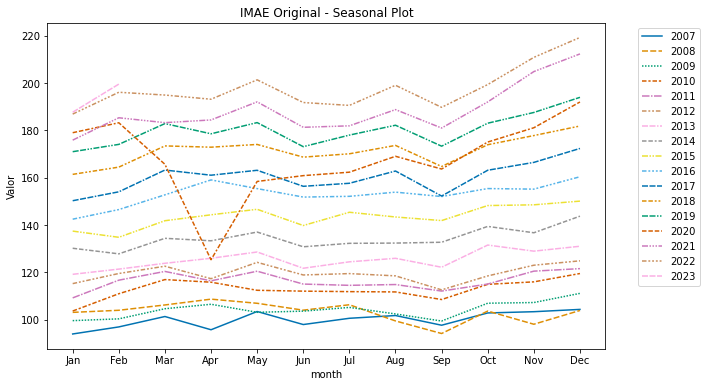

In [3]:
import seaborn as sns

#Separando mes y año para analizar estacionalidad
dfsns = df.copy()
dfsns["year"]=dfsns.index.year
dfsns["month"]=dfsns.index.strftime("%b")
#Creando grafico de parametros necesarios
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=dfsns,
            x="month",
            y="Valor",
            hue="year",
            style="year",
            legend="full",
            palette="colorblind")
plt.title("IMAE Original - Seasonal Plot")
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [4]:
#Test de estacionaridad de Dickey-Fuller
adf = ADF(df["Valor"])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  0.452
P-value                         0.983
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [5]:
#Test de estacionariedad KPSS
kpss = ADF(df["Valor"])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  0.452
P-value                         0.983
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


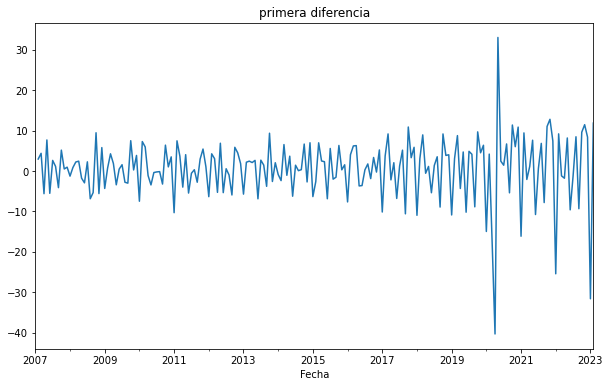

In [6]:
#Calcualndo diferencias
df["primera_diferencia"] = df.Valor.diff(1)
#Ampliar tamaño de grafico
fig, ax = plt.subplots(figsize=(10, 6))
#graficar primera diferencia
df["primera_diferencia"].plot(title="primera diferencia", ax=ax)

In [7]:
#Test de estacionaridad de Dickey-Fuller
adf = ADF(df["primera_diferencia"].dropna())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.900
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [8]:
#Test de estacionariedad KPSS
kpss = KPSS(df["primera_diferencia"].dropna())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.900
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
import numpy as np
df["valor_log"] = np.log(df.Valor)
df["valor_log"].plot()

In [ ]:
df["Valor"].pct_change().plot()